

The artificial neural network is inspired by a human brain neuron. The neural network has a core component called perceptron or artificial neuron which is typically activation function and it is connected with weighted input and output.  Activation function can be sigmoid function, Tanh function, and ReLU. 

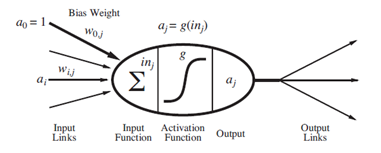
 
Figure 1.0: Mathematical model for a neuron

Figure 1.0, represents single neuron, which has activation function(g) connected by weighted input (Wi,j) and input (ai). 
Output activation(aj) is given in figure 2.0

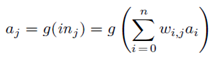 
 
Figure 2.0: simple activation function [1]

The neural network has multiple nodes in a layer (Figure 3.0). Each node in the adjacent layers is connected with weight. Node is an activation function which uses weights and input from the previous layer and forwards output to nodes of the following layer. 

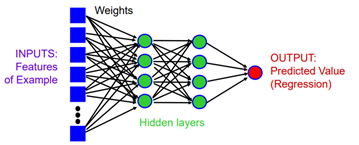
 
Figure 3.0: Neural Network with 2 hidden layers

Feedforward network can be 
a)	 Single-layer perceptron: which is a simple feedforward neural network without any hidden layer (the layer between the input and output layer). 
b)	Multi-layer perceptron: which has one or more hidden layers. 

This algorithm has Feed forward and back propagation process which is repeated for each training sample until convergence or specified number of iterations. 
1)	Feedforward propagation:
Initially, weights are randomly initialised.  Input from the input layer (1st layer) and weights is given to the activation function (see Figure 2.0) of the following layer. The output of that activation function is forwarded to the next layer as input. This process repeats until the output layer. The output of the activation function at the last layer (output layer) gives the output of the neural network.

2)	Backpropagation:
Backpropagation is used to adjust the weights at each layer such that the difference between the output of the neural network and actual output is minimum. 
Updating the weights has 2 stages, one at the output layer and another at the hidden layers. 
a)	At the output layer:

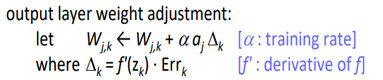
 
Figure 4.0: output layer weight adjustment

From Figure 4.0, Weights at the output layer (Wj,k) is updated by adding the product of the output of activation function(aj) and delta at the output layer (Δk). Where Δk is the product of the derivative function of f(Zk) and error (Errk - the difference between predicted output and actual output). Where Zk is the summation of weights and input from the activation function of the previous layer. 

b)	At the hidden layer:
 
 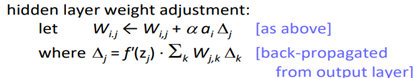

Figure 5.0: Hidden layer weight adjustment

From Figure 5.0, Weights at the hidden layer (Wi,j) is updated by adding the product of the output of activation function(ai) and delta at the hidden layer (Δj). Where Δj is the product of the derivative function of f(Zj) and summation of weights and delta(Δk) of the following layer. Where Zj is the summation of weights and input from the activation function of the previous layer. 



circles500 is a procedurally-generated dataset consists of two attributes per sample (X0 and X1) and two classes (0 and 1).
As this plot of the data shows, the classes are not linearly separable.

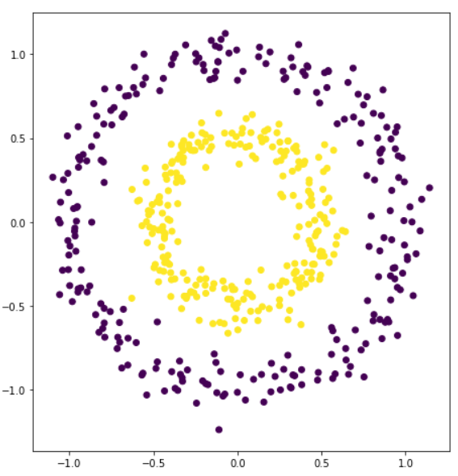


We are building a simple ANN to classify the non-linear data into the two different classes which is the first part.

We also build an ANN for classifying the images of Automobiles and Horse. A single layer Neural Network is built from scratch. Only the red band is used for modelling the ANN with 512 hidden nodes

Finally we try to improve the performance of the ANN by two ways: (1) Pretraining the ANN using the images from a different batch (2) By using the ReLu as the activation function for the hidden layer.

There is a significant increase in the performance wih both these enhancements

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# ANN class which has the methods for performing classication using Artifical Neural Network
class ANN:
  # Initialization
  def __init__(self,hidden_nodes):
    self.hidden_nodes = hidden_nodes

  # Sigmoid Function
  def sigmoid(self,X):
    return(1.0/(1.0+np.exp(-X)))

  # This function randomly assigns weights and bias to the Neural Network for the Circles dataset
  def randomize(self,output_nodes,input_nodes):
    # Layer 1 weight matrix
    self.w1=np.random.rand(self.hidden_nodes,input_nodes) 
    # Bias of Layer 1
    self.b1=np.ones((self.hidden_nodes,1))
    # Layer 2 weights
    self.w2=np.random.rand(output_nodes,self.hidden_nodes) 
    # Bias of layer 2
    self.b2=np.ones((output_nodes,1))

  # This function randomly assigns weights and bias to the Neural Network for the CIFAR Dataset
  def randomize_new(self,output_nodes,input_nodes):
    # Layer 1 weight matrix, not setting 
    self.w1=np.random.rand(self.hidden_nodes,input_nodes) * 0.0005
    # Bias of Layer 1
    self.b1=np.ones((self.hidden_nodes,1))
    # Layer 2 weights
    self.w2=np.random.rand(output_nodes,self.hidden_nodes) * 0.0005 
    # Bias of layer 2
    self.b2=np.ones((output_nodes,1))


  # This function implements the feedforward step of the ANN for a single hidden layer Neural Network
  def feedforward(self,input_matrix):
    # The input matrix 
    self.a0=input_matrix
    # Calculating the input for the activation function for layer 1
    self.z1=np.dot(self.w1,self.a0)+self.b1
    # Layer 1 hidden nodes values
    self.a1 = self.sigmoid(self.z1)    
    # Output of the neural network
    self.z2=np.dot(self.w2,self.a1) + self.b2
    # Applying sigmoid to the output
    self.a2=self.sigmoid(self.z2)
    return (self.a2)

  # This function implements the backpropagation step of the Neural Network for a single hidden layer
  def backpropagation(self,input_label):
    expect_y = input_label
    learning_rate=0.1
    # Calculating Error
    self.Err_k = self.a2 - expect_y
    # Calculating the delta k which has to be subtracted by the layer 2 weights
    delta_k = (self.sigmoid(self.z2)*(1-self.sigmoid(self.z2))*self.Err_k)
    # Updating Layer 2 weights
    self.w2 = self.w2 - learning_rate*(np.dot(delta_k,self.a1.transpose()))  
    # Calculating the delta j which has to be subtracted by the layer 2 weights
    delta_j =  self.sigmoid(self.z1)*(1-self.sigmoid(self.z1))*(np.dot(self.w2.T,delta_k))
    # Updating Layer 1 weights   
    self.w1 = self.w1 - learning_rate*(np.dot(delta_j,self.a0.transpose()))


  # This function trains the Neural Network for the circles data
  def training(self):
    # Read Circles Dataset
    dataset  = pd.read_csv("circles500.csv")
    # Randomize the weights based on the number of inputs and outputs
    self.randomize(1,2)
    # Divide dataset into training and testing randomly
    self.training = dataset.sample(frac=0.67,random_state=19230735)
    self.testing = dataset.drop(self.training.index) 
    # Run epochs 500 times
    for i in range(0,500):
      # Training the Neural Network with all the training data
      for index, row in self.training.iterrows():
        input_matrix = np.array((row['X0'],row['X1'])).reshape(2,1)
        input_label = np.array((row['Class']))
        self.feedforward(input_matrix)
        self.backpropagation(input_label)

  # This function predicts the outputs of the testing data for the circles data
  def predict(self):
    predicted = []
    for index, row in self.testing.iterrows():
      test_inputs = np.array((row['X0'],row['X1'])).reshape(2,1) 
      # Classifying using 0.5 as the threshold
      if self.feedforward(test_inputs) > 0.5:
        predicted.append(1)
      else:
        predicted.append(0)
    self.testing['Predicted'] = predicted
    return self.testing

  # This function is used to unpickle. This function taken from the CIFAR website
  def unpickle(self,file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


  # This function trains the Neural Network for the CIFAR Dataset. If pt = 1 then the Neural Network is pretrained using batch_1 
  def training_cifar(self,pt):
    # Randomize the weights based on the number of inouts and outputs
    if pt == 0:
      self.randomize_new(1,1024)
    # Using both batch 1 and batch 2 for training
    batch_2=self.unpickle("data_batch_2")
    # Getting the required image data from the batches
    pixels = batch_2[b'data']
    # Getting the required labels from the batches
    labels = batch_2[b'labels']
    #labels.extend(batch_1[b'labels'])
    req_labels = []
    req_pixels = []
    # Getting the data and labels for Automobile and Horse and assigning labels 0 and 1 to them
    for i in range(0,len(pixels)):
      if labels[i] == 1 or labels[i] == 7:
        if labels[i] == 1:
          req_labels.append(0)
        else:
          req_labels.append(1)
        req_pixels.append(pixels[i][:1024])
    # Creating a dataframe of the labels and features(pixel values of Red band)
    self.df = pd.DataFrame(req_pixels)
    self.df['Labels'] = req_labels
    # Dividing the data into training and testing data
    self.df_training = self.df.sample(frac=0.67,random_state=19230735)
    self.df_testing = self.df.drop(self.df_training.index)
    # Running the epoch for 150 times
    for j in range(0,150):
      # Training for all the images using only first 1024 values of the image data
      for i in range(0,len(self.df_training)):
        # Converting data into a matrix and running feedforward and backpropagation
        input_matrix = np.array(self.df_training.iloc[i,:1024]).reshape(1024,1)/256
        input_label = np.array(self.df_training['Labels'].iloc[i])
        self.feedforward(input_matrix)
        self.backpropagation(input_label)


# This function classifies the test images from the trained Neural Network for the CIFAR Dataset
  def predict_cifar(self):
    predicted = []
    for i in range(0,len(self.df_testing)):
      test_inputs = np.array(self.df_testing.iloc[i,:1024]).reshape(1024,1)/256
      # Setting the threshold to 0.5
      if self.feedforward(test_inputs) > 0.5:
        predicted.append(1)
      else:
        predicted.append(0)
    df = pd.DataFrame(self.df_testing['Labels'])
    df['Predicted'] = predicted
    return df


# Pretraining the weights with the images from a different batch
  def pre_training_cifar(self):
    # Randomize the weights based on the number of inputs and outputs
    self.randomize_new(1,1024)
    # Using both batch 1 and batch 2 for training
    batch_2=self.unpickle("data_batch_1")
    # Getting the required image data from the batches
    pixels = batch_2[b'data']
    # Getting the required labels from the batches
    labels = batch_2[b'labels']
    #labels.extend(batch_1[b'labels'])
    req_labels = []
    req_pixels = []
    # Getting the data and labels for Automobile and Horse and assigning labels 0 and 1 to them
    for i in range(0,len(pixels)):
      if labels[i] == 1 or labels[i] == 7:
        if labels[i] == 1:
          req_labels.append(0)
        else:
          req_labels.append(1)
        req_pixels.append(pixels[i][:1024])
    self.df = pd.DataFrame(req_pixels)
    self.df['Labels'] = req_labels
    # Running the epoch for 100 times 
    for j in range(0,150):
      # Training for all the images using only first 1024 values of the image data
      for i in range(0,len(self.df)):
        input_matrix = np.array(self.df.iloc[i,:1024]).reshape(1024,1)/256
        input_label = np.array(self.df['Labels'].iloc[i])
        self.feedforward(input_matrix)
        self.backpropagation(input_label)


  # ReLu feedforward
  def feedforward_relu(self, input_matrix):
    # The input matrix 
    self.a0=input_matrix

    # Calulating the input for the activation function for layer 1
    self.z1=np.dot(self.w1,self.a0)+self.b1

    # Layer 1 hidden nodes values
    self.deriva = self.z1 > 0 
    self.a1 = self.z1 * self.deriva

    # Output of the neural network
    self.z2=np.dot(self.w2,self.a1) + self.b2
    
    # Applying sigmoid to the output
    self.a2=self.sigmoid(self.z2)

    return (self.a2)


  # Relu backpropagation
  def backpropagation_relu(self, input_label):
    expect_y = input_label
    learning_rate=0.01  
    self.Err_k = self.a2 - expect_y

    # here stochastic gradient descent is used.
    # sigmoid output layer
    delta_k = (self.sigmoid(self.z2)*(1-self.sigmoid(self.z2))*self.Err_k)
    self.w2 = self.w2 - learning_rate*(np.dot(delta_k,self.a1.transpose())) 

    # ReLU hidden layer
    delta_j =  self.deriva * (np.dot(self.w2.T,delta_k))
    self.w1 = self.w1 - learning_rate*(np.dot(delta_j,self.a0.transpose()))


  # This function trains the Neural Network for the CIFAR Dataset.
  def training_cifar_relu(self):
    # Randomize the weights based on the number of inputs and outputs
    self.randomize_new(1,1024)
    # Using both batch 1 and batch 2 for training
    batch_2=self.unpickle("data_batch_2")
    # Getting the required image data from the batches
    pixels = batch_2[b'data']
    # Getting the required labels from the batches
    labels = batch_2[b'labels']
    #labels.extend(batch_1[b'labels'])
    req_labels = []
    req_pixels = []
    # Getting the data and labels for Automobile and Horse and assigning labels 0 and 1 to them
    for i in range(0,len(pixels)):
      if labels[i] == 1 or labels[i] == 7:
        if labels[i] == 1:
          req_labels.append(0)
        else:
          req_labels.append(1)
        req_pixels.append(pixels[i][:1024])
    self.df = pd.DataFrame(req_pixels)
    self.df['Labels'] = req_labels
    self.df_training = self.df.sample(frac=0.67,random_state=19230735)
    self.df_testing = self.df.drop(self.df_training.index)
    # Running the epoch
    for j in range(0,200):
      # Training for all the images using only first 1024 values of the image data
      for i in range(0,len(self.df_training)):
        input_matrix = np.array(self.df_training.iloc[i,:1024]).reshape(1024,1)/256
        input_label = np.array(self.df_training['Labels'].iloc[i])
        self.feedforward_relu(input_matrix)
        self.backpropagation_relu(input_label)

  # This function classifies the test images from the trained Neural Network for the CIFAR Dataset
  def predict_cifar_relu(self):
    predicted = []
    for i in range(0,len(self.df_testing)):
      test_inputs = np.array(self.df_testing.iloc[i,:1024]).reshape(1024,1)/256
      # Setting the threshold to 0.5
      if self.feedforward_relu(test_inputs) > 0.5:
        predicted.append(1)
      else:
        predicted.append(0)
    df = pd.DataFrame(self.df_testing['Labels'])
    df['Predicted'] = predicted
    return df

Testing with the Small Dataset

In [0]:
# Creating an ANN object of 8 nodes for testing the circles dataset
ann = ANN(10)

In [0]:
# Training the circles data
ann.training()

In [0]:
# Predicting the test set of the circles data
check = ann.predict()
check

,X0,X1,Class,Predicted
0,0.180647,0.552945,1,1
4,0.488279,-0.341202,1,1
8,1.062641,-0.188767,0,0
11,-0.391233,-0.890878,0,0
15,-0.110299,-1.236740,0,0
...,...,...,...,...
484,-0.496564,-0.271512,1,1
488,-0.996562,-0.142346,0,0
493,0.381416,-0.879070,0,0
495,0.532217,-0.008352,1,1


In [0]:
# Accuracy of the Circles Data
(sum(check['Class'] == check['Predicted'])/len(check))*100


99.39393939393939

Observations for Small Dataset

1) The accuracy of the Neural Network is very high(>90%) with 2/3rd of the data as training data and 1/3rd as testing data

2) The Learning rate for this dataset is 0.1

3) The whole training data is used 500 times(500 epochs) to get such a good accuracy

Testing with CIFAR Dataset

In [0]:
# Creating an ANN object of 512 nodes for testing the CIFAR dataset
ann = ANN(512)

In [0]:
ann.training_cifar(0)

In [0]:
# Predciting the test data of the CIFAR data
df = ann.predict_cifar()

In [0]:
df

,Labels,Predicted
0,0,1
3,1,1
4,0,0
11,0,1
14,0,0
...,...,...
2020,0,0
2021,1,1
2023,1,1
2028,1,1


In [0]:
# Accuracy of the CIFAR Data
df.columns = ['a', 'b']
sum(df['a'] == df['b'])/len(df)

0.7734724292101341

Observations

1) Running the epoch 150 times with a learning rate of 0.1

2) Using batch_2 data for training and testing where 2/3rd of data is used as training data and 1/3rd of data is used as testing data

3) Using the first 1024 values of the input images i.e, only using the Red band for classification

3) ANN performing well, giving a good accuracy of around 77.34%

Enhancement 1

The initial random weights do not give a good accuarcy. The Artificial Neural Network would give a better result if the weights are initialized with proper values before the Neural Network is trained. One way to achieve this is by pretraining. In pretraining the weights are added by training the neural network with a different dataset to obtain the initialize set of weights.

Batch 1 data is used for pretraining the Neural Network and assigning the weights thus learnt as the initial weights of the Neural Network, which is then trained and tested.

In [0]:
ann1 = ANN(512)

In [0]:
ann1.pre_training_cifar()

In [0]:
ann1.training_cifar(1)

In [0]:
df = ann1.predict_cifar()

In [0]:
df.columns = ['a', 'b']
sum(df['a'] == df['b'])/len(df)

0.8330849478390462

Observations

1) The Pretraining is done using the images from batch_1 

2) The Weights thus learnt are set as the initial weights of the Neural Network for the interested dataset(batch_2)

3) The Neural Network is trained with a learning rate of 0.1 and with 150 epochs of the training data which is 2/3rd of batch_2 dataset

4) Observing an accuracy of 83.3% which is significant increase from the neural network built without this enhancement 

Enhancement 2


Rectified linear unit (ReLU) is used as activation function in the hidden layer of the neural network as enhancement to the algorithm. Sigmoid is used as activation function at the output layer.

**Rectified linear unit (ReLU)**

Recitified linear unit is an activation function used in the neural network.

Blueline in figure 6.0, represents rectified activation function, which is at value 0 when the x-axis value is lesser than or equal to zero (0). When the x-axis value is greater than 0, the line gives corresponding x value.
 
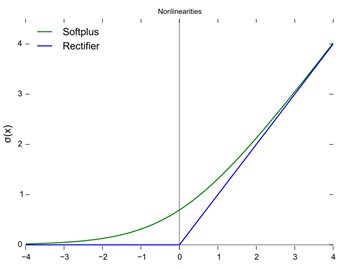

Figure 6.0: ReLU activation function [1]

ReLU activation function is represented as

**f(x) = max (0, x)**		- Formula 1.0 [2]

where x is an input to the activation function. If the value of x is negative or equal to zero (0) then f(x) is 0. If the value of x is positive then f(x) is the value of x. 

Derivative of f: 

f’(x) = 0 if value of x lesser than zero (0),
f’(x) = 1 if the value of x greater than zero (0) and 
f’(x) = undefined when x value is equal to zero (0), But in practice f’(0) = 0 is used. [2]

ReLU converges fast due to less computations. 

References:

[1] "Rectifier (neural networks)", En.wikipedia.org, 2020. [Online]. Available: https://en.wikipedia.org/wiki/Rectifier_(neural_networks). [Accessed: 25- Feb- 2020].

[2] M. Madden, "Topic 3: Deep Learning with Neural Networks", National University of Ireland, Galway, 2020.


In [0]:
ann_relu = ANN(10)

In [0]:
ann_relu.training_cifar_relu()

In [0]:
df=ann_relu.predict_cifar_relu()

In [0]:
df.columns = ['a', 'b']
sum(df['a'] == df['b'])/len(df)

0.7988077496274217

Observations

1) ReLU activation function is used in the hidden layer of the neural network.

2) The Neural Network is trained with a learning rate of 0.01 and with 200 epochs of the training data which is 2/3rd of batch_2 dataset.

3) Observing an accuracy of around 80% which is significant increase from the neural network built without this enhancement.